In [1]:
# faiss搜索相似图片并显示
# 1.从文件中加载faiss索引
# 2.从文件中加载文件名列表
# 3.挑选一些测试图片
# 4.提取测试图片的特征
# 5.搜索相似图片
# 6.显示相似图片

In [2]:
# 导入相关包
import torch
import torch.nn as nn
import timm
from torchvision import transforms as Transforms
import torch.nn.functional as F
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import faiss
import glob
import os
import tqdm

In [3]:
index = faiss.read_index("weights/index_idols.index")
# # 查看索引大小
# index.ntotal

In [4]:
# 从文件中加载文件名列表
names_list = np.load('./weights/names_list.npy')
# len(names_list)

In [ ]:
# 挑选一张图片
query_img_path ='./test_imgs/unknown_1.jpg'

In [6]:
# plt显示
img = cv2.imread(query_img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

: 

In [ ]:

# 导入自定义特征提取类
from tools.feature_extract import SwinTransformer, Data_Processor
# 实例化
data_processor = Data_Processor(height=224, width=224)
model = SwinTransformer(num_features=512).cuda()

# 提取特征函数
def getImgFeat(img_file):
    # PIL read image
    img = Image.open(img_file).convert("RGB")  # 读取图片，转换为RGB
    img = data_processor(img).cuda()  # 数据预处理
    feat = F.normalize(model(img), dim=1).cpu()  # 使用F.normalize对特征进行L2归一化
    return feat

In [ ]:
# 测试图片提取特征
with torch.no_grad():
        query_feat = getImgFeat(query_img_path)
query_feat_np = query_feat.numpy()
query_feat_np.shape

(1, 512)

In [ ]:
# 查询4张最相似图片
topN = 4
D, I = index.search(query_feat_np, topN)
print(D)
print(I)

[[0.12460164 0.12011013 0.09550867 0.09161589]]
[[13 16  9 10]]


In [ ]:
# 匹配index和name
indexs_list = names_list[I[0]]

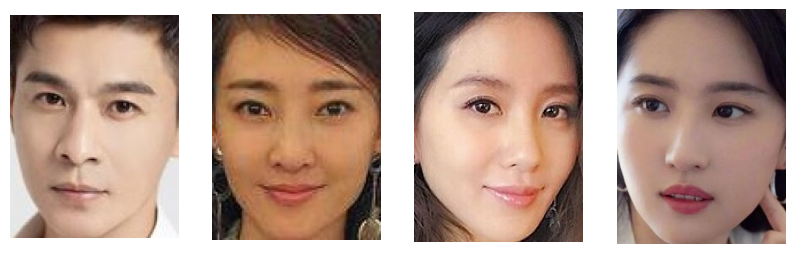

In [ ]:
# plt 4张图片
fig = plt.figure(figsize=(10, 10))
for i, name in enumerate(indexs_list):
    img_path = './selected_imgs/' + name + '.jpg'
    img = cv2.imread(img_path)
    plt.subplot(1, 4, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()